## Recurrent Neural Network

### Google opening stock price for month January (2017) is predicted. Last 5 year's data of Google stock price is used for analysis.

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing the training set
dataset_train = pd.read_csv('gdrive/My Drive/DS-Online-Training/Data-Files/Google_Stock_Price_Train.csv')
dataset_train.shape

(1258, 6)

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
# Slicing the Second column of the train data
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

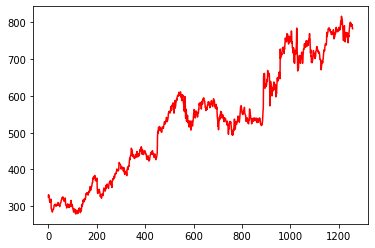

In [ ]:
# Plotting the first column of the train data
plt.plot(training_set, color = 'red', label = '5 years Google Stock Price')

In [ ]:
# Feature Scaling of the First Column of the Training Data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
y_train
print(X_train.shape)
print(X_train[:5])
print(y_train.shape)
print(y_train[:5])

(1198, 60)
[[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
  0.0585423  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514
  0.02797827 0.02379269 0.02409033 0.0159238  0.01078949 0.00967334
  0.01642607 0.02100231 0.02280676 0.02273235 0.02810849 0.03212665
  0.0433812  0.04475779 0.04790163 0.0440695  0.04648783 0.04745517
  0.04873875 0.03936305 0.04137213 0.04034898 0.04784582 0.04325099
  0.04356723 0.04286033 0.04602277 0.05398467 0.05738894 0.05714711
  0.05569611 0.04421832 0.04514845 0.04605997 0.04412531 0.03675869
  0.04486941 0.05065481 0.05214302 0.05612397 0.05818885 0.06540665
  0.06882953 0.07243843 0.07993526 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 0.07984225 0.0643277  0.0585423
  0.06568569 0.06109085 0.06639259 0.0614257  0.07474514 0.02797827
  0.02379269 0.02409033 0.0159238  0.01078949 0.00967334 0.01642607
  0.02100231 0.02280676 0.02273235 0.02810849 0.03212665 0.0433812
  0.04475779 0.04790163 0.0440695  0.04

In [ ]:
# Reshaping of the X_train 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [ ]:
#Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
y_train.shape

(1198,)

In [ ]:
# Fitting the RNN to the Training Dataset
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0388
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0038
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

In [ ]:
# Reading the real Google stock price for 20days in Jan 2017 from the .csv file
dataset_test = pd.read_csv('gdrive/My Drive/DS-Online-Training/Data-Files/Google_Stock_Price_Test.csv')
print(dataset_test.shape)
print(dataset_test.head)
real_stock_price = dataset_test.iloc[:, 1:2].values

(20, 6)
<bound method NDFrame.head of          Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4    1/9/2017  806.40  809.97  802.83  806.65  1,272,400
5   1/10/2017  807.86  809.13  803.51  804.79  1,176,800
6   1/11/2017  805.00  808.15  801.37  807.91  1,065,900
7   1/12/2017  807.14  807.39  799.17  806.36  1,353,100
8   1/13/2017  807.48  811.22  806.69  807.88  1,099,200
9   1/17/2017  807.08  807.14  800.37  804.61  1,362,100
10  1/18/2017  805.81  806.21  800.99  806.07  1,294,400
11  1/19/2017  805.12  809.48  801.80  802.17    919,300
12  1/20/2017  806.91  806.91  801.69  805.02  1,670,000
13  1/23/2017  807.25  820.87  803.74  819.31  1,963,600
14  1/24/2017  822.30  825.90  817.82  823.87  1,474,000
15  1/25/2017  829.62  835.77  825.06  835.67  1,4

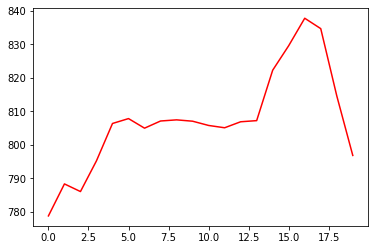

In [ ]:
#Plotting the Actual Google Stock Price for the 20 days of the year 2017
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')

In [ ]:
# Getting the predicted Google Stock Price of the year 2017 (for the 20 Test Data)
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
print(dataset_total.shape)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(len(dataset_total))
print(inputs.shape)
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # Feature Scaling of Test Data
print(inputs.shape)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
print(predicted_stock_price[:5])

(1278,)
1278
(80,)
(80, 1)
(20, 60)
[[775.44684]
 [772.54095]
 [772.8619 ]
 [774.48114]
 [777.8815 ]]


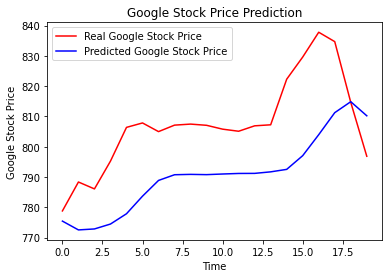

In [ ]:
# Visualising the Real Vs prediced Google_stock_prices for the 20 days in the year 2017
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()